In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
data = pd.read_csv("bmi.csv")

In [104]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [106]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [107]:
gender = LabelEncoder()
data['Gender']= gender.fit_transform(data['Gender'])

In [108]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [109]:
tbins = (-1 ,0 , 1, 2 , 3,4,5, 6 )
health = ['malnourished', 'underweight','fit','slightly overweight','overweight','extremely overweight', 'obese']
data['Index'] = pd.cut(data['Index'], bins=tbins, labels=health)

In [90]:
data['Index']

0                overweight
1                       fit
2                overweight
3       slightly overweight
4       slightly overweight
               ...         
495    extremely overweight
496              overweight
497    extremely overweight
498    extremely overweight
499    extremely overweight
Name: Index, Length: 500, dtype: category
Categories (7, object): ['malnourished' < 'underweight' < 'fit' < 'slightly overweight' < 'overweight' < 'extremely overweight' < 'obese']

In [111]:
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Index', ylabel='count'>

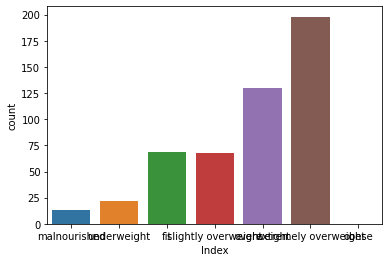

In [92]:
sns.countplot(data['Index'])

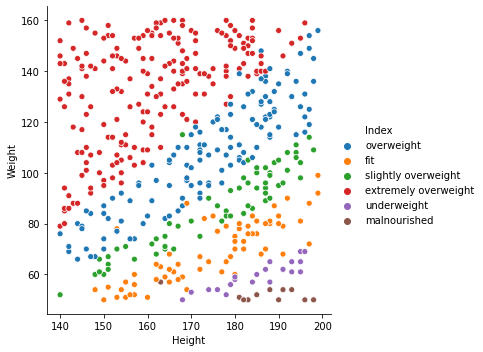

In [93]:
sns.relplot(x='Height',y='Weight',hue="Index", data=data)

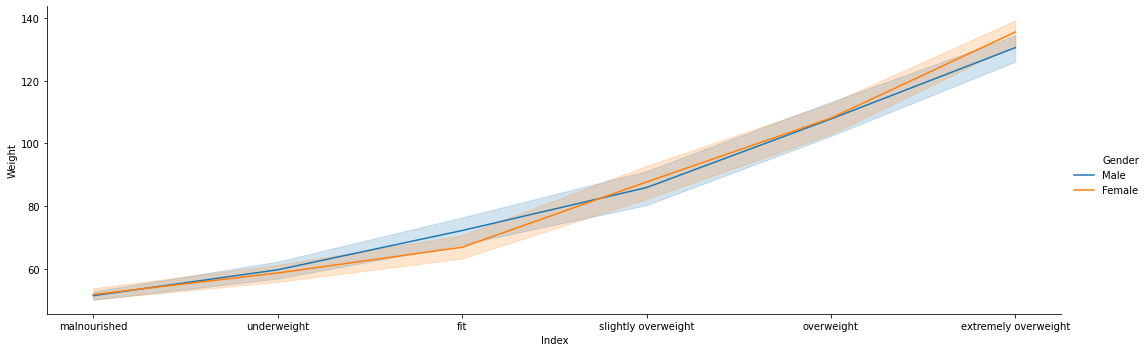

In [94]:
sns.relplot(x='Index',y='Weight',hue="Gender", kind='line', data=data, height = 5, aspect = 3)

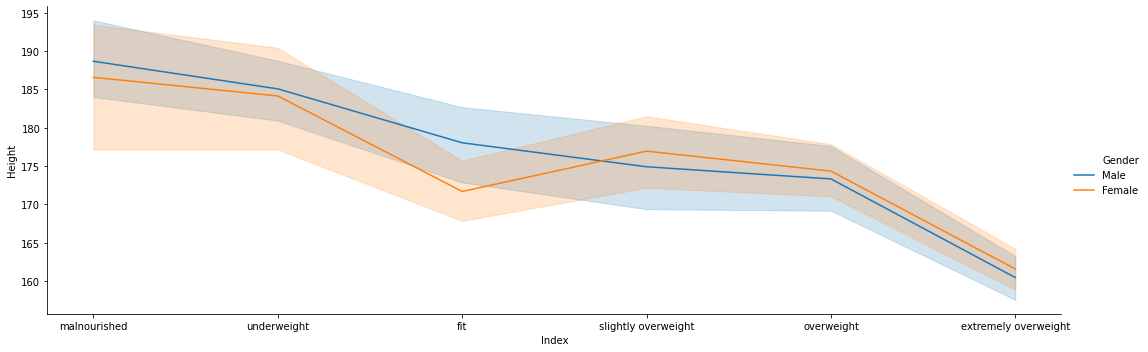

In [95]:
sns.relplot(x='Index',y='Height',hue="Gender", kind='line', data=data, height = 5, aspect = 3)

In [112]:
X = data.drop('Index',axis=1)
y = data['Index']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

In [114]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [117]:
clf = svm.SVC()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

In [118]:
print(classification_report(y_test,pred))

                      precision    recall  f1-score   support

extremely overweight       0.88      0.97      0.92        36
                 fit       0.73      0.80      0.76        10
        malnourished       0.00      0.00      0.00         3
          overweight       0.96      0.78      0.86        32
 slightly overweight       0.78      0.93      0.85        15
         underweight       0.60      0.75      0.67         4

            accuracy                           0.85       100
           macro avg       0.66      0.71      0.68       100
        weighted avg       0.84      0.85      0.84       100



C:\Users\rickh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
print(confusion_matrix(y_test,pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [120]:
print(accuracy_score(y_test,pred))

0.85


In [129]:
a = [[0,185,110]]
a = s.transform(a)
b = clf.predict(a)

In [130]:
b

array(['overweight'], dtype=object)

In [131]:
data

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight
...,...,...,...,...
495,0,150,153,extremely overweight
496,0,184,121,overweight
497,0,141,136,extremely overweight
498,1,150,95,extremely overweight
